In [1]:
import numpy as np
import librosa.display
import sounddevice as sd
from scipy.io.wavfile import write
import scipy.io.wavfile as wav
from scipy.io import wavfile
from scipy import signal
import matplotlib.pyplot as plt
from pylab import clf

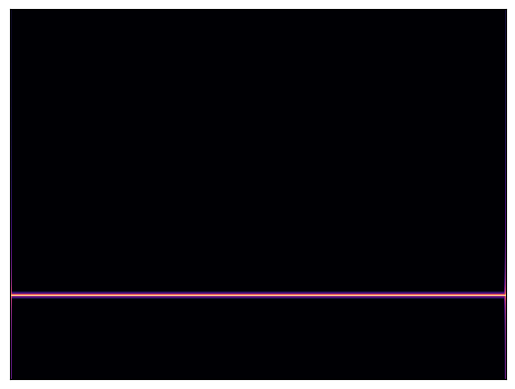

In [3]:
#Section 2 - Sine Tone Generation

#Sample rate and duration
fs = 44100
duration = 5

#Defining a number of samples and making a time array
Number_Samples = fs * duration
t = np.arange(Number_Samples) / fs

#Defining a frequency and writing a sine tone
f = 5000
tone = np.sin(2 * np.pi * f * t)

#Playing the sine tone using sounddevice
sd.play(tone/20, fs)

#I hear a pure tone playing pretty high in pitch

#Save to a wave file
write('Team[Obermaier]-sinetone.wav', fs, tone)

#Plot spectrogram of tone
freq1 = librosa.amplitude_to_db(np.abs(librosa.stft(tone)), ref=np.max)
librosa.display.specshow(freq1)

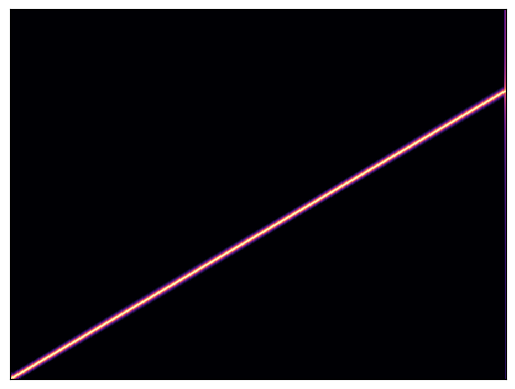

In [4]:
#Section 3 - Chirp Signal Generation

#Sample rate and duration
fs = 41000
duration = 5

#Defining a number of samples and making a time array
Number_Samples = fs * duration
t = np.arange(Number_Samples) / fs


#Defining changing frequency
def f(t):
    f_start = 0
    f_end = 8000
    return f_start + (f_end - f_start) * t / duration

#Defining the chirp signal using f(t)
chirp = np.sin(2 * np.pi * f(t) * t)

#Playing the sine tone using sounddevice
sd.play(chirp/20, fs)

#I hear constant tone that increases with frequency

#Save to a wave file
write('Team[Obermaier]-chirp.wav', fs, tone)

#Plot spectrogram of tone
freq2 = librosa.amplitude_to_db(np.abs(librosa.stft(chirp)), ref=np.max)
librosa.display.specshow(freq2)

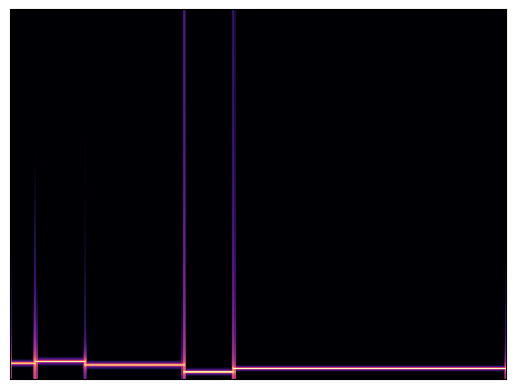

In [5]:
#Section 4 - Fun with sine tones

#Sample rate and duration
fs = 44100
duration = 5

#Defining a number of samples and making a time array
Number_Samples = fs * duration
t = np.arange(Number_Samples) / fs

#Defining the times for the sine waves
t_1 = t[0:11025]
t_2 = t[11026:33076]
t_3 = t[33077:77177]
t_4 = t[77176:99228]
t_5 = t[99229:220500]

#Making the CETK music notes
Note_1 = np.sin(2 * np.pi * 932 * t_1)
Note_2 = np.sin(2 * np.pi * 1046 * t_2)
Note_3 = np.sin(2 * np.pi * 830 * t_3)
Note_4 = np.sin(2 * np.pi * 415 * t_4)
Note_5 = np.sin(2 * np.pi * 622 * t_5)

#Stringing the sequence together
sequence = np.concatenate((Note_1, Note_2, Note_3, Note_4, Note_5))
   
#Playing the sine tone using sounddevice
sd.play(sequence/20, fs)

#The sound that's played is a lot more pure than the sound in the youtube video, the youtube video kind of sounds like a saw wave and this is a pure sine

#Save to a wave file
write('team[Obermaier]-cetk.wav', fs, sequence)

#Plot spectrogram of tone
freq3 = librosa.amplitude_to_db(np.abs(librosa.stft(sequence)), ref=np.max)
librosa.display.specshow(freq3)

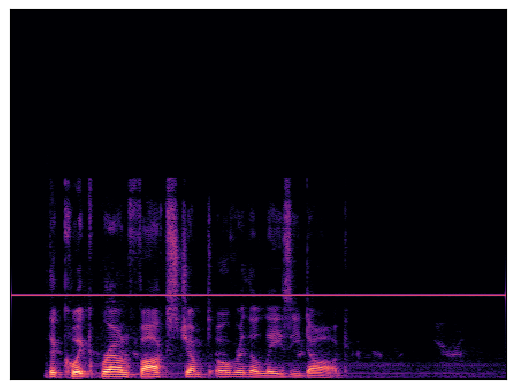

In [19]:
#Section 5 - Combining Sound Files

#Read in wav files
fs, phrase = wav.read('Phrase1.wav')
fs, sine = wav.read('Team[Obermaier]-sinetone.wav')

#Convert phrase to mono audio by using only 1 channel
phrase_mono = phrase[:, 0]

#Scale volume of sine wave so it's not too loud
sine_adjusted = sine/50

#Combine the two signals via superposition
combined = phrase_mono + sine_adjusted

#Play signal
sd.play(combined)

#Save as wav file
write('team[Obermaier]-speechchirp.wav', fs, combined)

#Plot spectrogram of tone
freq4 = librosa.amplitude_to_db(np.abs(librosa.stft(combined)), ref=np.max)
librosa.display.specshow(freq4)

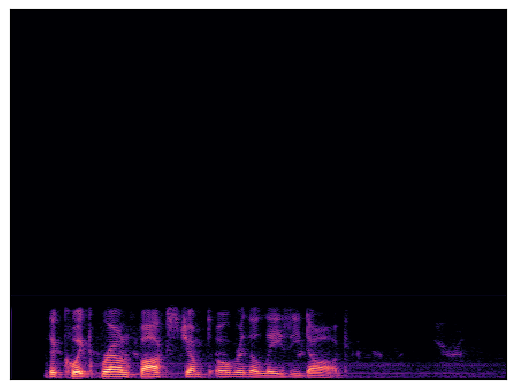

In [9]:
#Section 6 - Speech and Audio Filtering

#Read in combined file
fs, combine = wav.read('Team[Obermaier]-speechchirp.wav')

# Define the cutoff frequency
cutoff_freq = 4000  # 4 kHz

# Normalize the cutoff frequency to Nyquist frequency
nyquist_freq = 0.5 * fs
cutoff_norm = cutoff_freq / nyquist_freq

# Design a Butterworth lowpass filter
order = 25  # Filter order
b, a = signal.butter(order, cutoff_norm, btype='low')

# Apply the filter to the signal
filtered_signal = signal.lfilter(b, a, combine)

#Play signal
sd.play(filtered_signal)

#Write to a wav file
write('team[Obermaier]-filteredspeechsine.wav', fs, filtered_signal)

#Plot spectrogram of tone
freq5 = librosa.amplitude_to_db(np.abs(librosa.stft(filtered_signal)), ref=np.max)
librosa.display.specshow(freq5)

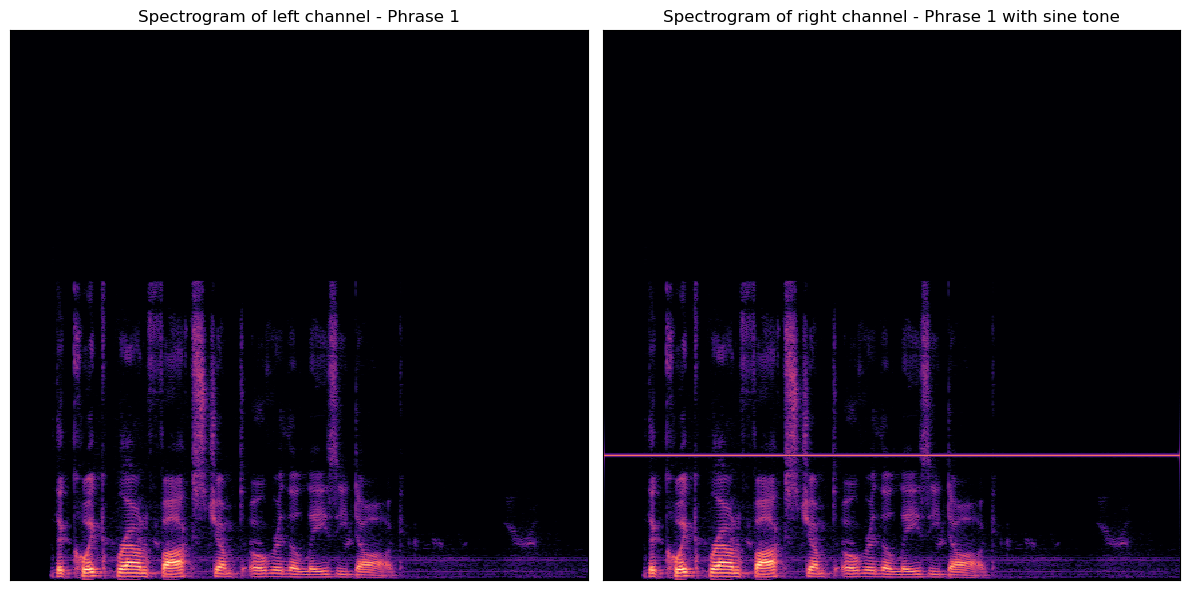

In [20]:
#Section 7 - Stereo Fun

#Read in wav files
fs, phrase = wav.read('Phrase1.wav')
fs, speechchirp = wav.read('team[Obermaier]-speechchirp.wav')

#Convert phrase to mono audio by using only 1 channel
phrase_mono = phrase[:, 0]

#Combine two channels to make stereo
left_channel = phrase_mono
right_channel = speechchirp
stereo_audio = np.column_stack((left_channel, right_channel))

#Play stereo_audio
sd.play(stereo_audio)

#Write to a wav file
write('team[Obermaier]-stereospeechsine.wav', fs, stereo_audio)

#Generating spectrogram subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot spectrogram of phrase 1
freq6 = librosa.amplitude_to_db(np.abs(librosa.stft(phrase_mono)), ref=np.max)
librosa.display.specshow(freq6, ax=axs[0])
axs[0].set_title('Spectrogram of left channel - Phrase 1')

# Plot spectrogram of speechchirp
freq7 = librosa.amplitude_to_db(np.abs(librosa.stft(speechchirp)), ref=np.max)
librosa.display.specshow(freq7, ax=axs[1])
axs[1].set_title('Spectrogram of right channel - Phrase 1 with sine tone')

plt.tight_layout()
plt.show()